#### Setup

In [1]:
from google.colab import drive
import sys

In [2]:
drive.mount('/content/drive')
sys.path.append('/content/drive/Shareddrives/CMPE260/')

Mounted at /content/drive


In [43]:
%run /content/drive/Shareddrives/CMPE260/code/rec_implementation.ipynb

cpu


#### Training

In [4]:
train_env = Environment(train_matrix)

hits, dcgs = [], []
hits_all, dcgs_all = [], []
step, best_step = 0, 0
step, best_step, best_step_all = 0, 0, 0

users = np.random.permutation(apt_users)

In [5]:
for u in tqdm.tqdm(users):
    print('user =', u)
    actions = []
    user, memory = train_env.reset(u)

    for t in range(int(train_matrix[u].sum())):
      try:
        # given current state, get action using actor network
        action_emb = policy_network(state_representation(user, memory))
        action = policy_network.get_action(user, torch.tensor(train_env.memory[user.detach().cpu().numpy().astype(int), :]), state_representation, action_emb,
            torch.tensor([item for item in train_env.available_books if item not in train_env.viewed_books]).long()
        )
      except Exception as e:
        print(e)

      # update replay buffer
      user, memory, reward, done = train_env.step(action, action_emb, replay_buffer)

      # update weights of action and critic network
      if len(replay_buffer) > params['batch_size']:
          update(params['batch_size'], params['gamma'], params['min_value'], params['max_value'], params['soft_tau'])

      # monitor training process by evaluating on only one user for efficiency
      if step % 100 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, test_loader)

          hits.append(hit)
          dcgs.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits[best_step], dcgs[best_step]])) >= 0:
              best_step = step // 100
              torch.save(policy_network.state_dict(), params['log_base_dir'] + 'policy_net.pth')
              torch.save(value_network.state_dict(), params['log_base_dir'] + 'value_net.pth')
              torch.save(state_representation.state_dict(), params['log_base_dir'] + 'state_repr.pth')

      # evaluate for best policy after every 1000 steps on the whole test set
      if step % 1000 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, full_loader)

          hits_all.append(hit)
          dcgs_all.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits_all[best_step_all], dcgs_all[best_step_all]])) >= 0:
              best_step_all = step // 1000
              torch.save(policy_network.state_dict(), params['log_base_dir'] + 'best_policy_net.pth')
              torch.save(value_network.state_dict(), params['log_base_dir'] + 'best_value_net.pth')
              torch.save(state_representation.state_dict(), params['log_base_dir'] + 'best_state_repr.pth')

      step += 1

  0%|          | 0/52 [00:00<?, ?it/s]

user = 125


  2%|▏         | 1/52 [00:09<08:22,  9.85s/it]

user = 1


  4%|▍         | 2/52 [00:18<07:27,  8.95s/it]

user = 75


  6%|▌         | 3/52 [00:25<06:45,  8.28s/it]

user = 143


  8%|▊         | 4/52 [00:32<06:08,  7.69s/it]

user = 179


 10%|▉         | 5/52 [00:41<06:20,  8.09s/it]

user = 172


 12%|█▏        | 6/52 [00:47<05:48,  7.58s/it]

user = 70


 13%|█▎        | 7/52 [05:29<1:12:50, 97.11s/it]

user = 184


 15%|█▌        | 8/52 [05:40<51:14, 69.88s/it]  

user = 222


 17%|█▋        | 9/52 [05:46<35:42, 49.83s/it]

user = 213


 19%|█▉        | 10/52 [05:55<26:00, 37.15s/it]

user = 242


 21%|██        | 11/52 [06:05<19:44, 28.88s/it]

user = 54


 23%|██▎       | 12/52 [06:13<14:59, 22.50s/it]

user = 25


 25%|██▌       | 13/52 [10:48<1:04:19, 98.95s/it]

user = 205


 27%|██▋       | 14/52 [10:56<45:20, 71.60s/it]  

user = 93


 29%|██▉       | 15/52 [11:05<32:28, 52.65s/it]

user = 132


 31%|███       | 16/52 [11:14<23:38, 39.41s/it]

user = 199


 33%|███▎      | 17/52 [11:20<17:07, 29.37s/it]

user = 198


 35%|███▍      | 18/52 [11:27<12:57, 22.88s/it]

user = 196


 37%|███▋      | 19/52 [11:36<10:11, 18.53s/it]

user = 43


 38%|███▊      | 20/52 [16:09<50:35, 94.87s/it]

user = 137


 40%|████      | 21/52 [16:18<35:49, 69.33s/it]

user = 36


 42%|████▏     | 22/52 [16:30<26:00, 52.03s/it]

user = 78


 44%|████▍     | 23/52 [16:38<18:47, 38.87s/it]

user = 226


 46%|████▌     | 24/52 [16:49<14:13, 30.48s/it]

user = 134


 48%|████▊     | 25/52 [16:58<10:51, 24.14s/it]

user = 243


 50%|█████     | 26/52 [21:29<42:32, 98.17s/it]

user = 105


 52%|█████▏    | 27/52 [21:36<29:30, 70.81s/it]

user = 52


 54%|█████▍    | 28/52 [21:46<21:00, 52.52s/it]

user = 5


 56%|█████▌    | 29/52 [21:51<14:41, 38.32s/it]

user = 22


 58%|█████▊    | 30/52 [21:59<10:38, 29.01s/it]

user = 82


 60%|█████▉    | 31/52 [22:08<08:03, 23.01s/it]

user = 99


 62%|██████▏   | 32/52 [26:33<31:56, 95.81s/it]

user = 141


 63%|██████▎   | 33/52 [26:39<21:48, 68.86s/it]

user = 11


 65%|██████▌   | 34/52 [26:48<15:13, 50.76s/it]

user = 32


 67%|██████▋   | 35/52 [26:53<10:30, 37.07s/it]

user = 211


 69%|██████▉   | 36/52 [27:04<07:48, 29.26s/it]

user = 63


 71%|███████   | 37/52 [27:09<05:29, 21.97s/it]

user = 238


 73%|███████▎  | 38/52 [27:17<04:08, 17.78s/it]

user = 162


 75%|███████▌  | 39/52 [31:41<19:51, 91.63s/it]

user = 136


 77%|███████▋  | 40/52 [31:49<13:18, 66.57s/it]

user = 83


 79%|███████▉  | 41/52 [31:59<09:06, 49.67s/it]

user = 239


 81%|████████  | 42/52 [32:07<06:10, 37.02s/it]

user = 212


 83%|████████▎ | 43/52 [32:18<04:22, 29.16s/it]

user = 203


 85%|████████▍ | 44/52 [32:24<02:58, 22.32s/it]

user = 21


 87%|████████▋ | 45/52 [36:47<11:02, 94.59s/it]

user = 124


 88%|████████▊ | 46/52 [36:57<06:55, 69.24s/it]

user = 27


 90%|█████████ | 47/52 [37:04<04:12, 50.43s/it]

user = 38


 92%|█████████▏| 48/52 [37:09<02:27, 36.92s/it]

user = 14


 94%|█████████▍| 49/52 [37:18<01:25, 28.51s/it]

user = 144


 96%|█████████▌| 50/52 [37:24<00:43, 21.64s/it]

user = 67


 98%|█████████▊| 51/52 [37:34<00:18, 18.31s/it]

user = 12


100%|██████████| 52/52 [42:00<00:00, 48.46s/it]


In [ ]:
# save memory
with open(params['log_base_dir'] + 'memory.pickle', 'wb') as f:
  pickle.dump(train_env.memory, f)

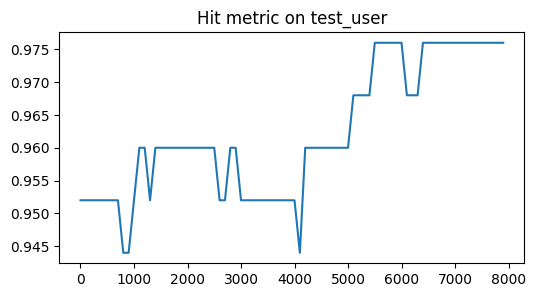

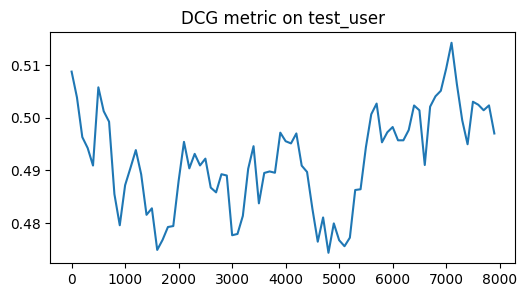

In [44]:
plot_hit(hits, 100, 'test_user')
plot_dcg(dcgs, 100, 'test_user')

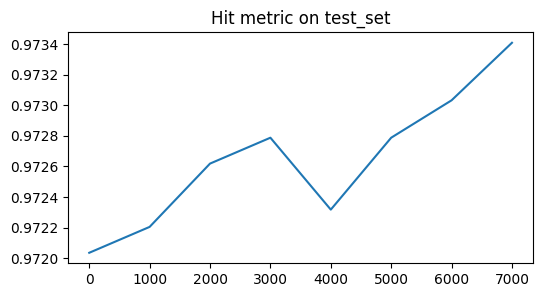

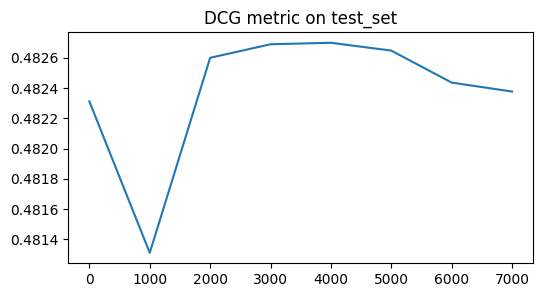

In [45]:
plot_hit(hits_all, 1000, 'test_set')
plot_dcg(dcgs_all, 1000, 'test_set')

#### Evaluation on test set

In [ ]:
with open(params['log_base_dir'] + 'memory.pickle', 'rb') as f:
  memory = pickle.load(f)

In [ ]:
# evaluate best policy on test set
state_rep = State_Representation(num_of_users, num_of_books, params['embedding_dim'], params['hidden_dim'])
policy = Actor(params['embedding_dim'], params['hidden_dim'])

state_rep.load_state_dict(torch.load(params['log_base_dir'] + 'best_state_repr.pth'))
policy.load_state_dict(torch.load(params['log_base_dir'] + 'best_policy_net.pth'))

<All keys matched successfully>

In [ ]:
hit, dcg = evaluation(policy, state_rep, memory, full_loader)
print('hit rate: ', hit, 'dcg: ', dcg)

hit rate:  0.9616925246826517 dcg:  0.47774772225701184


#### Inference

In [ ]:
random_user = test_data['user'].sample().iloc[0]
random_user

138

In [ ]:
temp_test_data = test_data[test_data.user == random_user]
temp = pd.merge(temp_test_data, filtered_df, on=['user', 'book'])
temp

,user,book,isbn,title,author,user_id,rating,best_seller
0,138,3823,679454497,Blood and Gold (Vampire Chronicles),Anne Rice,83671,8.0,True
1,138,6848,441005241,"Burnt Offerings (Anita Blake, Vampire Hunter)",Laurell K. Hamilton,83671,9.0,False
2,138,12272,316174939,The Art of Tasha Tudor,Harry Davis,83671,10.0,False
3,138,24415,60916060,The Reshaping of Everyday Life : 1790-1840 (Ev...,Jack Larkin,83671,9.0,False
4,138,26982,679759611,The Unredeemed Captive: A Family Story from Ea...,John Demos,83671,9.0,False
5,138,26986,395735270,Tasha Tudor's Heirloom Crafts,Tovah Martin,83671,10.0,True
6,138,26988,803297033,"Waheenee, an Indian Girl's Story",Gilbert L. Wilson,83671,9.0,False
7,138,27019,899661084,Smoky House,Elizabeth Goudge,83671,9.0,False
8,138,27024,441642748,The Other Glass Teat,Harlan Ellison,83671,9.0,False
9,138,27034,451096835,Approaching Oblivion,Harlan Ellison,83671,9.0,False


In [ ]:
recommendations = []

for model, state_representation in zip([policy], [state_rep]):
    env = Environment(test_matrix)
    user, memory = env.reset(random_user)

    # give 2 books that the user has rated in the past
    user, memory, reward, _ = env.step(torch.tensor([12272]))
    user, memory, reward, _ = env.step(torch.tensor([26986]))

    # get next 3 recommendations based on the two books above
    recs = []
    for i in range(3):
        action_emb = model(state_representation(user, memory))
        action = model.get_action(
            user,
            torch.tensor(env.memory[user.detach().cpu().numpy().astype(int), :]),
            state_representation,
            action_emb,
            torch.tensor([item for item in env.available_books if item not in env.viewed_books]).long()
        )
        user, memory, reward, _ = env.step(action)
        recs.append(action)

    recommendations.append(recs)

In [ ]:
recos = [r.item() for r in recommendations[0]]
recos

[8552, 3823, 17454]

In [ ]:
recommended_books = filtered_df[filtered_df.book.isin(recos)][['title', 'author', 'best_seller']].drop_duplicates()
recommended_books

,title,author,best_seller
110919,Blood and Gold (Vampire Chronicles),Anne Rice,True
166748,Beowulf : A New Verse Translation,Seamus Heaney,False
253456,His Touch,Mary Lynn Baxter,True
